In [235]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [236]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import skimage.io as io
import torch
import torchvision.transforms as TT
from torch.utils.data import DataLoader
import cnn
from data_augment import *
from dataloader import FaceKeypointsDataset
from display import *
from learn import test, train

In [237]:
ROOT_DIR = Path("imm_face_db")

# Initialite Datasets

transform = part2_augment
# Use all 6 images of the first 32 persons (index 1-32) as the training set
# (total 32 x 6 = 192 images)
training_set = FaceKeypointsDataset(
    idxs=np.arange(33), root_dir=ROOT_DIR, transform=transform
)
assert len(training_set) == 192

# Use images of the remaining 8 persons (index 33-40) as the validation set
# (total 8 * 6 = 48 images)
validation_set = FaceKeypointsDataset(
    idxs=np.arange(32, 40), root_dir=ROOT_DIR, transform=transform
)
assert len(validation_set) == 48

# Initialize Dataloaders
batch_size = 16
train_loader = DataLoader(training_set, batch_size, shuffle=True)
test_loader = DataLoader(validation_set, batch_size, shuffle=False)

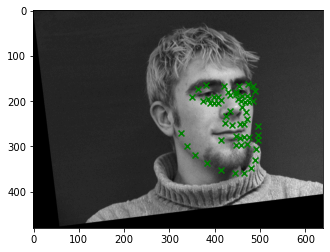

In [241]:
# Plotting a few input images and their face keypoints.
sample = training_set[3]
image, points = sample
show_keypoints(image, points)

  0%|          | 0/12 [00:00<?, ?it/s]========== Epoch 0 ==========
img: torch.Size([16, 1, 480, 640])
  0%|          | 0/3 [00:00<?, ?it/s]img: torch.Size([16, 1, 480, 640])


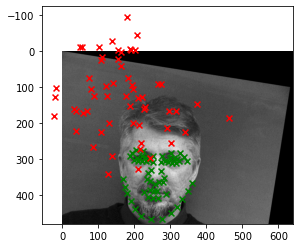

100%|██████████| 3/3 [00:04<00:00,  1.65s/it]
========== Epoch 0 ==========
train_loss = 86007.828125
valid_loss = 34847.973958333336



In [233]:
# Training and Testing

epochs = 1
learn_rate = 0.001
show_every = 3
loss_per_epoch = []
for ep in range(epochs):
    print(f"========== Epoch {ep} ==========")
    trained_model, train_loss = train(
        train_loader, cnn.FaceFinder(), learn_rate
    )
    _, valid_loss = test(test_loader, trained_model, show_every)
    
    print_epoch(ep, train_loss, valid_loss)
    loss_per_epoch.append([train_loss, valid_loss])